# Austin Reed
### CLIM711 Homework 5; Displaying Data from the Default Barotropic Model

In [1]:
#import all necessary packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


In [2]:
# Load in the file and its contents
f= '/scratch/areed29/clim711/gfdl_spectral_code/experiments/t85barotropic/barotropic.nc'
DS= xr.open_dataset(f,decode_times=False)
print(DS)

<xarray.Dataset>
Dimensions:   (lat: 128, latb: 129, lon: 256, lonb: 257, time: 25)
Coordinates:
  * lon       (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lonb      (lonb) float64 -0.7031 0.7031 2.109 3.516 ... 356.5 357.9 359.3
  * lat       (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * latb      (latb) float64 -90.0 -88.28 -86.87 -85.46 ... 86.87 88.28 90.0
  * time      (time) float64 1.0 2.0 3.0 4.0 5.0 ... 21.0 22.0 23.0 24.0 25.0
Data variables:
    ucomp     (time, lat, lon) float32 ...
    vcomp     (time, lat, lon) float32 ...
    vor       (time, lat, lon) float32 ...
    pv        (time, lat, lon) float32 ...
    stream    (time, lat, lon) float32 ...
    trs       (time, lat, lon) float32 ...
    tr        (time, lat, lon) float32 ...
    eddy_vor  (time, lat, lon) float32 ...
    delta_u   (time, lat, lon) float32 ...
Attributes:
    filename:   barotropic.nc
    title:      t85barotropic
    grid_type:  regular
    grid_tile: 

In [3]:
#Extract necessary variables from the file
data_lat = DS.lat.values
data_lon = DS.lon.values
u_comp=DS.ucomp.values
v_comp=DS.vcomp.values
vor = DS.vor
pv= DS.pv.values
stream= DS.stream.values
trs = DS.trs.values
tr = DS.tr.values
eddy_vor = DS.eddy_vor.values
delta_u = DS.delta_u.values
print(np.shape(vor))
#Select vorticity values for days 1, 5, 10, and 25
vorticity_days = vor.sel(time=(vor['time'][0],vor['time'][4],vor['time'][9],vor['time'][24]))
print(np.shape(vorticity_days))
# #Day 1
# day1_vor= vor[0,:,:]
# #Day 5
# day5_vor=vor[4,:,:]
# #Day 10
# day10_vor=vor[9,:,:]
# #Day 25
# day25_vor= vor[24,:,:]

(25, 128, 256)
(4, 128, 256)


Text(0.5, 0.98, 'Vorticity Field from Barotropic Model for Select Days')

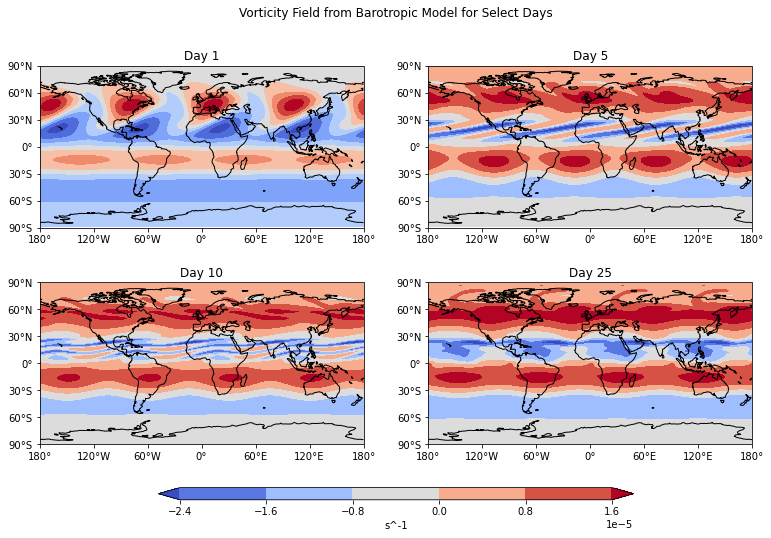

In [5]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,day in enumerate(vorticity_days):
        day_list = ['Day 1','Day 5','Day 10','Day 25']
        data= vorticity_days[i,:,:]
        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=data_lon)

        # Contour plot
        cs=axs[i].contourf(lons,data_lat,data,transform = ccrs.PlateCarree(), cmap='coolwarm',extend='both')
        #cs = axs[i].quiver(lons,data_lat,np.sign(data),data)
       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(day_list[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95, wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='s^-1')

# Add a big title at the top
plt.suptitle('Vorticity Field from Barotropic Model for Select Days')

### Brief Explanation of figure:
Looking at the vorticity field for the barotropic model for days 1, 5, 10, and 25, cyclonic (or positive) vorticity is represented in red, with anticyclonic (or negative) vorticity represented in blue. For Day 1, it is shown that in the Northern Hemisphere, around 45 N, there are 4 local maxima in cyclonic vorticity (1.6 x10^-5 s^-1) for longitudes 180 W, 60W, 30E, 120E, and a swath of ~0.6 s^-1 of cyclonic vorticity from 0-30S across all longitudes. Local maxima in antityclonic (negative) vorticity occur from 0-30N. By day 5, the vorticity becomes more zonally symmetric, and the positive values in the Northern Hemisphere are zonally elongated. The swath of negative values from 0-30N decrease and become more seperated, and then tilt horizontally by day 10. Meanwhile, the positive (cylonic) vorticity values from 0-30S also become more zonally elongated by days 10 and 25, increasing in magnitude. By day 25, both the positive and negative vorticity values become more zonally symmetric, with wider spatial extents of cylonic/antityclonic vorticity. These findings all fall in line with a sinusoidal disturbance decaying over time to a zonally symmetric flow, resmbeling that found in the upper troposphere in the Northern Hemisphere winter.